In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:
# Create a dummy subdirectory to make flow_from_directory work
dummy_dir = os.path.join(test_dir, 'dummy_class')
if not os.path.exists(dummy_dir):
    os.makedirs(dummy_dir)

# Move all files from the original test_dir into the dummy_class directory
for filename in os.listdir(test_dir):
    file_path = os.path.join(test_dir, filename)
    if os.path.isfile(file_path):
        os.rename(file_path, os.path.join(dummy_dir, filename))

# Now use flow_from_directory with the dummy subfolder
test_image_generator = ImageDataGenerator(rescale=1./255)  # Add rescaling if needed
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,  # No labels for prediction
    shuffle=False      # Don't shuffle, so the order of images is preserved
)

Found 50 images belonging to 1 classes.


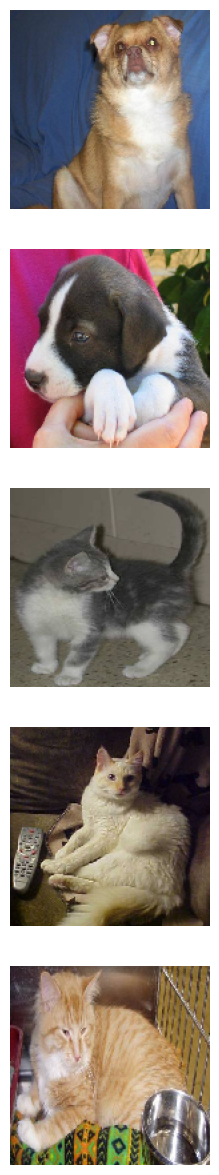

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Rescaling the image values to [0, 1]
    rotation_range=40,            # Random rotation in the range of 0-40 degrees
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Random shearing
    zoom_range=0.2,               # Random zooming
    horizontal_flip=True,         # Random horizontal flip
    fill_mode='nearest',          # Filling in pixels that might be empty after transformation
    brightness_range=[0.8, 1.2], # Random brightness adjustment (80%-120%)
    channel_shift_range=50.0,     # Randomly shift the color channels
    validation_split=0.2          # Split data for validation (useful when splitting a dataset)
)

Found 2000 images belonging to 2 classes.


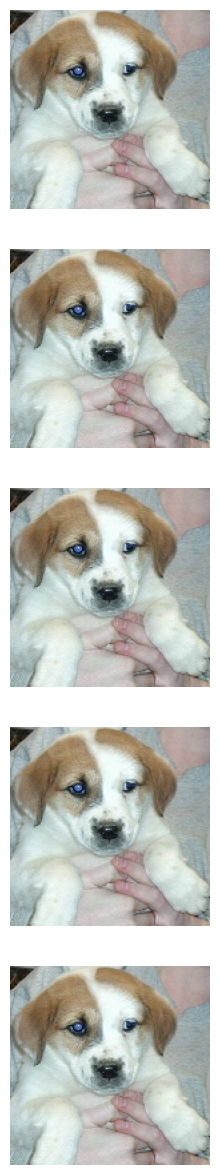

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7

# Initialize the model
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel, and 'relu' activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# Flatten the output of the last convolutional layer
model.add(Flatten())

# Add a fully connected (dense) layer
model.add(Dense(128, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer with a single unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Display the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 147968)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      18,940,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,033,409 (72.61 MB)

 Trainable params: 19,033,409 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
# Compile the model
model.compile(
    optimizer='adam',                # Optimizer to use
    loss='binary_crossentropy',       # Loss function for binary classification
    metrics=['accuracy']             # Metrics to monitor during training
)

# Train the model using the ImageDataGenerator for the training data
history = model.fit(
    train_data_gen,                  # The data generator for training
    steps_per_epoch=train_data_gen.samples // batch_size,  # Number of steps per epoch
    epochs=epochs,                        # Number of epochs for training
    validation_data=val_data_gen,    # The data generator for validation
    validation_steps=val_data_gen.samples // batch_size, # Number of steps for validation
    verbose=1                         # Display progress bar
)



Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 503ms/step - accuracy: 0.5155 - loss: 1.5493 - val_accuracy: 0.5234 - val_loss: 0.6875
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.4141 - loss: 0.6975 - val_accuracy: 0.5346 - val_loss: 0.6891
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.5166 - loss: 0.6941 - val_accuracy: 0.4967 - val_loss: 0.6818
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.4844 - loss: 0.6814 - val_accuracy: 0.6161 - val_loss: 0.6758
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.5889 - loss: 0.6815 - val_accuracy: 0.5759 - val_loss: 0.6810
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.5703 - loss: 0.6741 - val_accuracy: 0.6038 - val_loss: 0.6749
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 706ms/step - accuracy: 0.5700 - loss: 0.6767 - val_accuracy: 0.6083 - val_loss: 0.6712
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.6641 - loss: 0.6679 - val_accuracy:

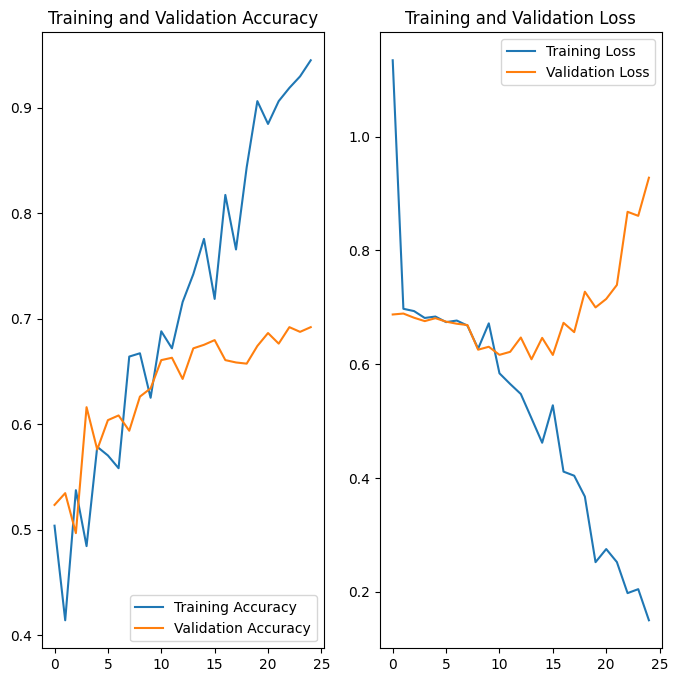

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


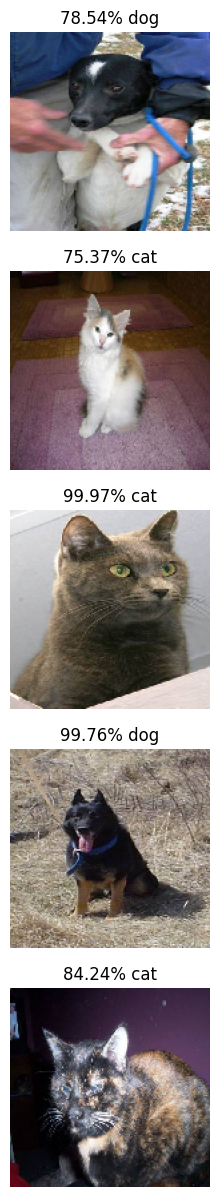

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


sample_testing_images = next(test_data_gen)

predictions = model.predict(sample_testing_images)

probabilities = predictions.flatten()

plotImages(sample_testing_images[:5], probabilities=probabilities[:5])




In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 64.0% of the images of cats and dogs.
You passed the challenge!
